### Question 3

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

iris_X, iris_y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, 
    iris_y, 
    test_size=0.2, 
    random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Question 7

In [4]:
! pip install -q datasets
from sklearn.feature_extraction.text import CountVectorizer
from datasets import load_dataset

imdb = load_dataset('imdb')
imdb_train, imdb_test = imdb['train'], imdb['test']

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()
y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

c:\Users\quanb\anaconda3\envs\ts\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating unsupervised split: 100%|██████████| 50000/50000 [00:00<00:00, 309170.81 examples/s]


MemoryError: Unable to allocate 13.9 GiB for an array with shape (25000, 74849) and data type int64

### Question 13

In [6]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

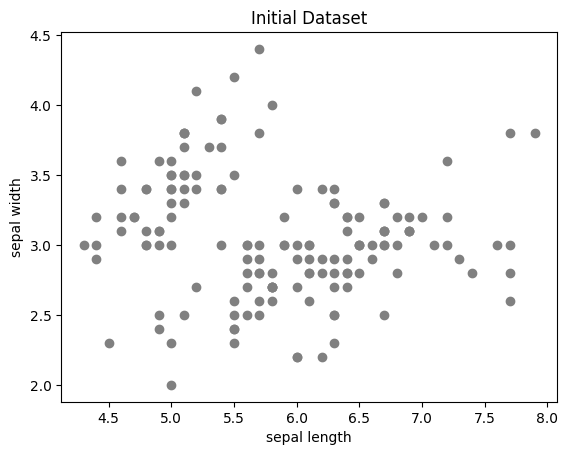

In [22]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :3]

# Plotting the data
plt.scatter(data[:, 0], data[:, 1], c = 'gray')
plt.title('Initial Dataset')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [16]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k                   # Số cụm
        self.max_iters = max_iters   # Số vòng lặp tối đa
        self.centroids = None        # Tọa độ tâm cụm
        self.clusters = None         # Cụm của từng điểm dữ liệu

    def initialize_centroids(self, data):
        """
        Khởi tạo ngẫu nhiên tâm cụm
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        """
        Tính khoảng cách Euclid giữa hai điểm dữ liệu
        Parameters:
            x1 (numpy.ndarray): điểm dữ liệu 1
            x2 (numpy.ndarray): điểm dữ liệu 2
        Return:
            float: khoảng cách Euclid
        """
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        """
        Phân cụm dữ liệu
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            numpy.ndarray: mảng chứa cluster của từng điểm dữ liệu
        """

        # Tính toán khoảng cách giữa mỗi điểm dữ liệu (data point) và tâm (centroids) bằng cách sử dụng hàm euclidean_distance
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])

        # print(np.argmin(distances, axis=1)) # Có thể in ra dòng này để thấy cách biểu diễn mảng chứa allocation
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        """
        Cập nhật tâm cụm
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            numpy.ndarray: mảng chứa tâm cụm mới
        """
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        """
        Hàm huấn luyện
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        # Gọi tới phương thức khởi tạo ngẫu nhiên tâm cụm
        self.initialize_centroids(data)
        self.plot_clusters(data, 0)

        for i in range(self.max_iters):
            # Gán cụm cho các data point gần nhất
            self.clusters = self.assign_clusters(data)

            # Visualize các cụm và tâm cụm tại iteration này
            self.plot_clusters(data, i)

            # Dựa vào các data point của từng cụm, dịch chuyển tâm cụm tới vị trí trung tâm (tính mean) của cụm
            new_centroids = self.update_centroids(data)

            # Nếu tâm cụm không di chuyển, dừng lại
            if np.all(self.centroids == new_centroids):
                break

            # Nếu tâm cụm có di chuyển, thực hiện lại vòng lặp với các giá trị tâm cụm mới
            self.centroids = new_centroids
            self.plot_clusters(data, i)

        # Plot kết quả cuối cùng của các cụm, tâm cụm
        self.plot_final_clusters(data)


    def plot_clusters(self, data, iteration):
        """
        Vẽ các cụm và tâm cụm tại mỗi iteration
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
            iteration (int): iteration hiện tại
        Return:
            None
        """
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        """
        Vẽ các cụm và tâm cụm cuối cùng
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

C:\Users\quanb\AppData\Local\Temp\ipykernel_104352\4024455331.py:98: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)


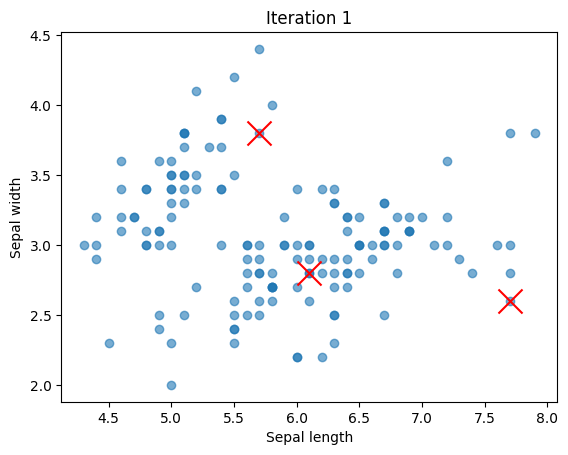

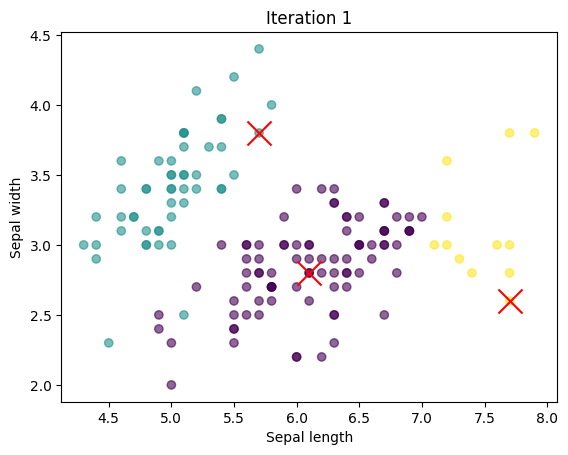

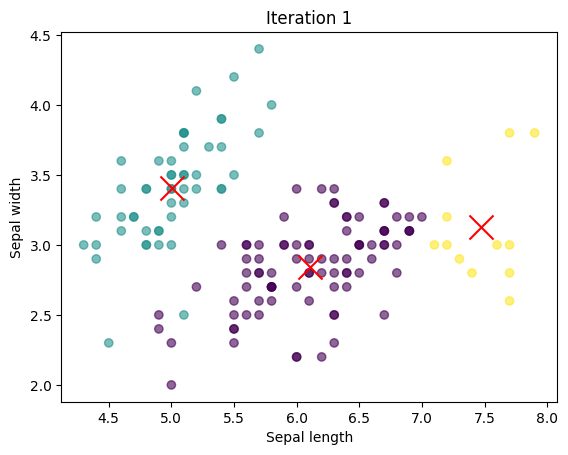

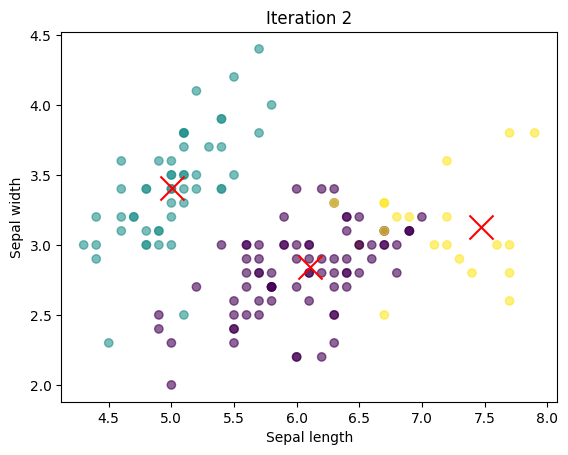

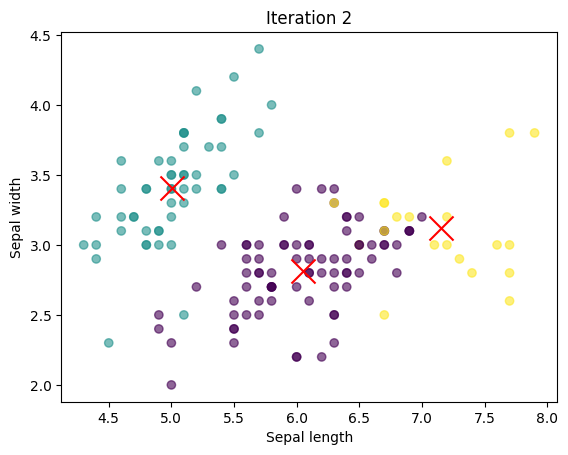

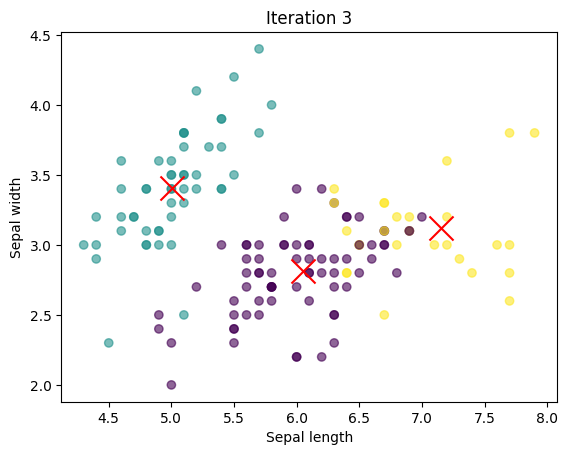

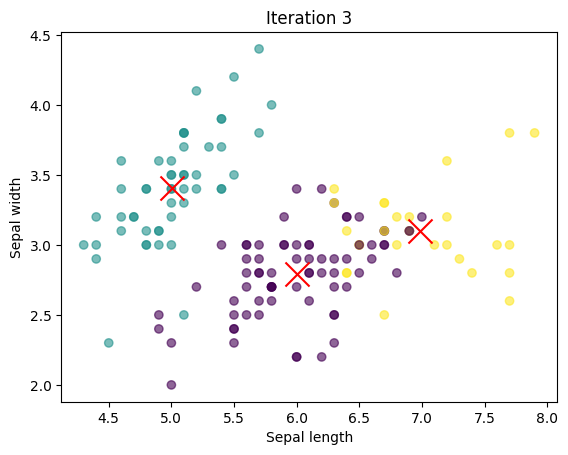

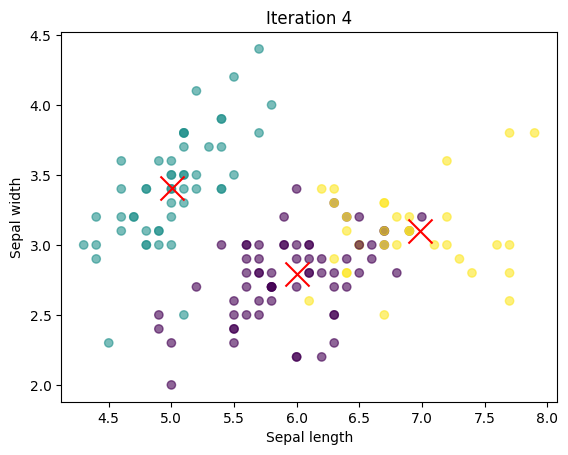

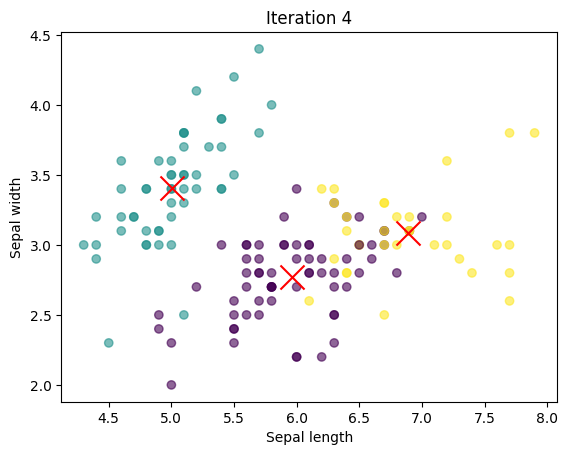

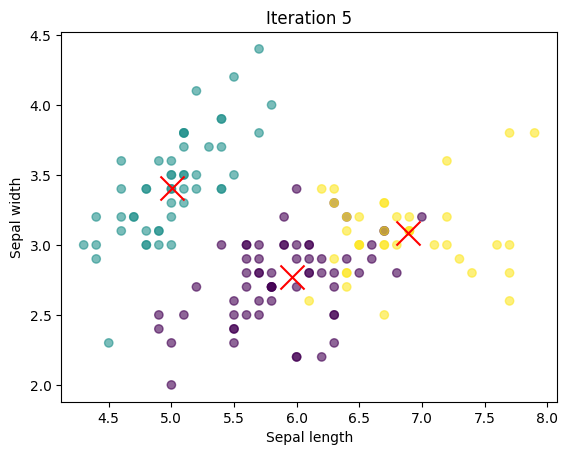

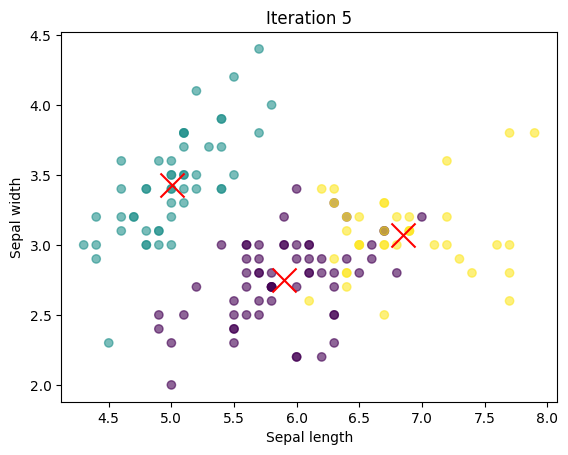

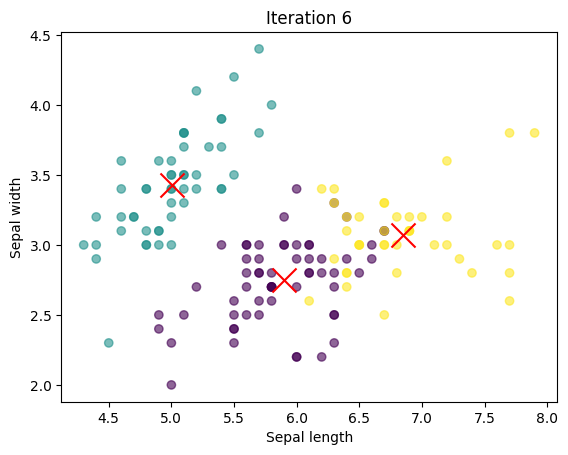

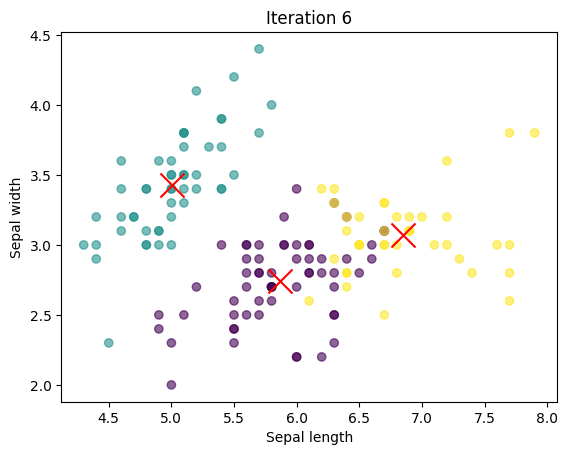

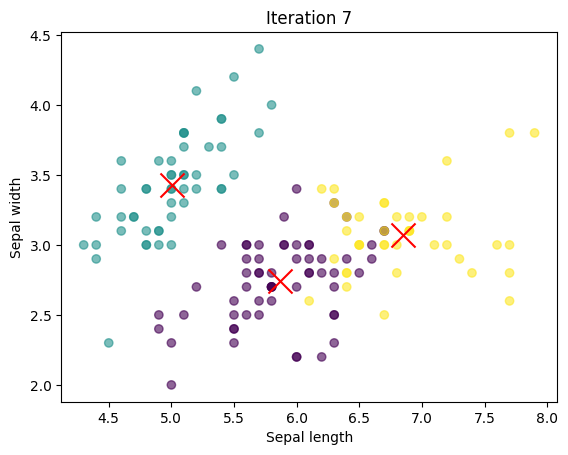

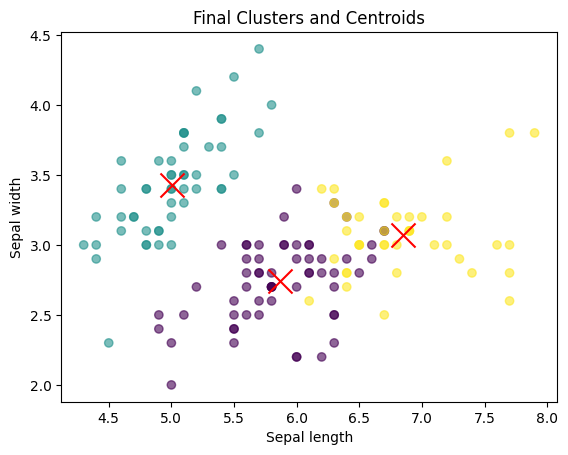

[[5.86833333 2.74       4.38166667]
 [5.006      3.428      1.462     ]
 [6.8525     3.07       5.6925    ]]


In [20]:
kmeans = KMeans(k=3)
kmeans.fit(data)
print(kmeans.centroids)